# Approche mathématiques sur la "Recommandation automatique et adaptative d’emojis"

## Présentation de la thèse étudiée

La thèse étudiée traite sur la **recommandation automatique et adaptative d'emojis**. <br/>

J'ai choisi ce sujet car je le trouve très pertinent dans le sens où nous en utilisons tous les jours sur nos claviers, que ce soit entre amis, famille ou même au travail ;) <br/>

Ces petites images pouvant représenter une idée, un concept ou une émotion, nous permettent de nous exprimer d'une manière plus visuelle et rapide à la fois. <br/>

Le parcours de bibliothèques d’emojis ou l’utilisation de moteur de recherche intégré n’est plus suffisant pour permettre à l’utilisateur de maximiser leur utilisation, une recommandation d’emojis adaptée est donc nécessaire. Pour cela, les travaux de la thèse étudiée sont axés sur le thème de la recommandation d’emojis. Ces travaux ont pour objectif de créer un système de recommandation automatique d’emojis adapté à un contexte conversationnel informel et privé. Ce système doit améliorer l’expérience utilisateur et la qualité de la communication, en plus de pouvoir prendre en compte d’éventuels nouveaux emojis. <br/>

La thèse étant riche en information, nous n'étudierons que la **partie 3 sur la prédiction automatique d'emojis**. <br/>

Nous allons, ci-dessous, étudier un algorithme qui nous permet de calculer le nombre d’étapes minimales nécessaires pour transformer la chaîne de caractères a en b en itérant parallèlement sur chacun de leurs caractères. Vous trouverez tout le détail dans **la partie 3.2**.

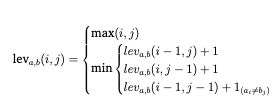

In [1]:
from PIL import Image
image = Image.open("Formule.png")
image

Il s'agit de **l’algorithme de Levenshtein**. <br/>

La distance de Levenshtein est une distance, au sens mathématique du terme, donnant une mesure de la différence entre deux chaînes de caractères. Elle est égale au nombre minimal de caractères qu'il faut supprimer, insérer ou remplacer pour passer d’une chaîne à l’autre.<br/>

Elle a été proposée par Vladimir Levenshtein en 1965. Elle est également connue sous les noms de distance d'édition ou de déformation dynamique temporelle, notamment en reconnaissance de formes et particulièrement en reconnaissance vocale.<br/>

Cette distance est d'autant plus grande que le nombre de différences entre les deux chaînes est grand. La distance de Levenshtein peut être considérée comme une **généralisation de la distance de Hamming**. On peut montrer en particulier que la distance de Hamming est un majorant de la distance de Levenshtein.

## Définition de la formule

On appelle distance de Levenshtein entre deux mots M et P le coût minimal pour transformer M en P en effectuant les seules opérations élémentaires suivantes :

* substitution d'un caractère de M par un caractère différent de P ;
* insertion (ou ajout) dans M d'un caractère de P ;
* suppression (ou effacement) d'un caractère de M.

<br/><br/>
Pour illustrer ce constat, prenons pour exemple un lexique témoin avec le terme "fun" lié à l’emoji "bonhomme qui sourit" et le terme "gun" lié à l’emoji "pistolet". <br/>

Si l’on se réfère à l’algorithme initial de Levenshtein, la distance entre les deux chaînes de caractères est égale à 1 par simple substitution du premier caractère "f" en "g". Cela nous donne ainsi une prédiction de l’emoji   pour le terme "fun", ce qui est loin du résultat escompté. <br/>

C’est pour cette raison que nous avons décidé de modifier la valeur de la fonction de coût de substitution (*a*<sub>i</sub> ≠ *b*<sub>j</sub> ) = 1, en l’augmentant à 2, voire à 3, de telle sorte que la substitution devienne <sub>i</sub> ≠ *b*<sub>j</sub> ) = 2. <br/>

En effet, lors de la comparaison du mot prédit par les HMM *(section qu'on n'étudiera pas ici mais que vous pourrez retrouver dans la première source)* et le lexique de mots et d’emojis, nous imposons une limite stricte en permettant au lexique d’être utilisé uniquement en cas de différence minime entre un élément du vocabulaire et le mot prédit, c’est-à-dire une distance d’édition de 1. <br/>

De cette manière nous évitons l’un des principaux inconvénients de l’utilisation d’un lexique qui est présent dans les modèles de prédictions d’emojis existants : la prédiction prématurée d’emojis non pertinents. En effet, cet inconvénient est réduit par l’apport de l’auto-complétion des mots effectuée en amont, et qui **permet alors de prédire plus efficacement un emoji pour un mot en cours d’écriture en prenant en compte le contexte précédent**. <br/>

Associée à cette correspondance plus stricte du mot au lexique, la prédiction de l’emoji à l’emplacement immédiat en devient plus efficace et pertinente. <br/>


Pour ces raisons, la distance d’édition utilisée est donc celle de Levenshtein dans laquelle la pondération de la substitution est modifiée. Cela a pour effet d’augmenter la distance entre deux chaînes de caractères liées par une substitution, contrairement à l’insertion et à la suppression.

## Etude de l'algorithme

L’algorithme ci-dessous, dû à Wagner et Fischer (1974), permet de calculer la distance de Levenshtein entre deux chaînes de caractères courtes. <br/>

Cet algorithme est un exemple de programmation dynamique qui utilise une matrice de dimension *(n+1)×(m+1)* où *n* et *m* sont les dimensions des deux chaînes de caractères. <br/>

Dans le pseudo-code suivant, la chaîne *chaine1* est de longueur *longueurChaine1* et *chaine2* est de longueur *longueurChaine2*. Cet algorithme renvoie un entier positif ou nul. Par définition d'une distance au sens mathématique du terme, l'algorithme renvoie 0 si et seulement si les deux chaînes sont égales. Pour deux chaînes de longueurs données, la valeur maximale de la distance est la longueur de la chaîne la plus longue.

### Algorithme

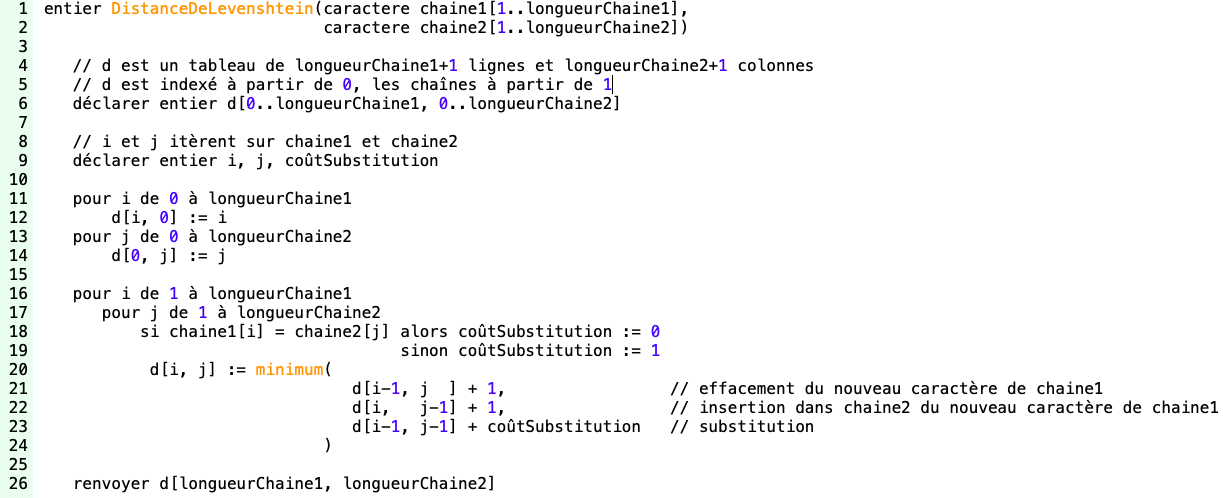

In [3]:
from PIL import Image
image2 = Image.open("Algorithme.png")
image2

En plus des lignes de codes commentées, nous allons réaliser un exemple afin de mieux s'approprier l'algorithme.<br/>

*chaine1* = « NICHE » <br/>
*chaine2* = « CHIENS »

### Intuitions
On pourrait, à l'oeil nu, se dire qu'il faut 5 étapes pour passer de *chaine1* à *chaine2*:
On supprime de "N" et "I" → CHE ;
On insère de "I", "N" et "S" → CHIENS.

La distance de Levenshtein d entre « NICHE » et « CHIENS » serait donc d'au plus 5. Pour le vérifier formellement, nous allons détailler chaque étape de l'algorithme ci-dessous.


### Fonctionnement de l'algorithme

La longueur de la *chaîne1* vaut n=5
La longueur de la *chaîne2* vaut m=6

Si n=0 alors retourner d=m et quitter
Si m=0 alors retourner d=n et quitter

Construire une matrice M de n+1 lignes et m+1 colonnes.
Initialiser la première ligne par la matrice ligne [ 0,1,….., m-1, m] et la première colonne par la matrice colonne [ 0,1,….., n-1, n]:

|   |   | C | H | I | E | N | S |
|---|---|---|---|---|---|---|---|
|   | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
| N | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| I | 2 | 0 | 0 | 0 | 0 | 0 | 0 |
| C | 3 | 0 | 0 | 0 | 0 | 0 | 0 |
| H | 4 | 0 | 0 | 0 | 0 | 0 | 0 |
| E | 5 | 0 | 0 | 0 | 0 | 0 | 0 |

<br/>
On remplit ensuite la matrice M en utilisant la règle suivante  M[i, j] est égale au minimum entre les éléments suivants :

* L’élément directement au-dessus et on ajoute 1 : M[i-1, j] + 1. **(effacement)**
* L’élément directement avant et on ajoute 1 : M[i, j-1] + 1. **(insertion)**
* L’élément diagonal précédent plus le coût : M[i-1, j-1] + Cout(i-1, j-1). **(substitution)**

|   |   | C | H | I | E | N | S |
|---|---|---|---|---|---|---|---|
|   | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
| N | 1 | 1 | 2 | 3 | 4 | 4 | 5 |
| I | 2 | 2 | 2 | 2 | 3 | 4 | 5 |
| C | 3 | 2 | 3 | 3 | 3 | 4 | 5 |
| H | 4 | 3 | 2 | 3 | 4 | 4 | 5 |
| E | 5 | 4 | 3 | 3 | 3 | 4 | 5 |

<br/>
La distance de Levenshtein entre les chaînes 1 et 2 se retrouve en M[n, m] soit M[5, 6].

Ici, on retrouve bien les 5 opérations trouvées de manière intuitive, la dernière matrice fournit aussi explicitement une des suites d'opérations permettant de passer d'une chaîne de caractères à l'autre (Il existe 3 suites possibles).

## Tutoriel vidéo

Vous trouverez sur le lien https://www.youtube.com/watch?v=We3YDTzNXEk une courte vidéo qui reprend l'algorithme.
<br/>
Elle vous sera utile si vous êtes plus à l'aise avec des explications autidives et visuelles.
Elle est en anglais ;)

## Sources

https://hal-amu.archives-ouvertes.fr/tel-02491135/document <br/>

https://fr.wikipedia.org/wiki/Distance_de_Levenshtein